# Installation of Libraries 

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import PyPDF2
import re
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from fuzzywuzzy import fuzz

from scipy import stats
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae
from sklearn.linear_model import  Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error







c:\Users\PC\anaconda3\envs\install_demo3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# convert text content of a PDF file into a single string

import PyPDF2

def pdf2Text(filename):
    ''' load pdf and return the text'''
    text = ''
    # open the pdf file
    with open(filename, 'rb') as file:
        # create a PDF reader object
        reader = PyPDF2.PdfReader(file)

        # loop over each page
        for page in reader.pages:
            # extract text from the page and concat
            text += page.extract_text()

    # return all texts
    return text

In [3]:
#assign extracted pdf to a variable

jd = pdf2Text('D:\\Research Docs\\dataset\\Job description.pdf')
# print(jd)

In [4]:

# create a dataframe of train data
csvData = pd.read_csv('D:\\Research Docs\\dataset\\train.csv')

In [5]:

#get column names
csvData.columns

Index(['CandidateID', 'Match Percentage'], dtype='object')

In [6]:
csvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CandidateID       90 non-null     object 
 1   Match Percentage  90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [7]:
csvData.describe()

,Match Percentage
count,90.000000
mean,39.645333
std,16.032770
min,4.810000
25%,35.937500
50%,44.650000
75%,50.542500
max,69.210000


In [8]:

#check duplicates
print(csvData.duplicated().sum())

0


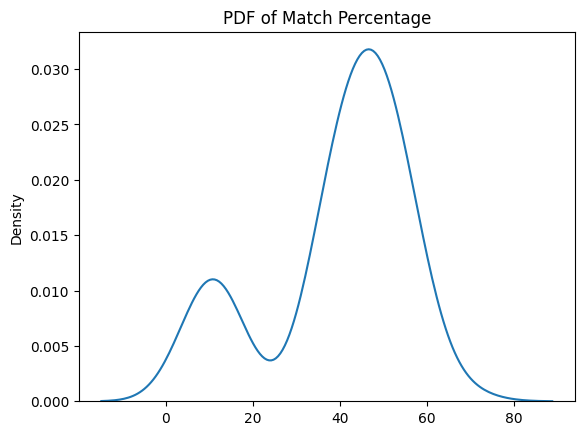

In [9]:
#plot distribution of matching percentage

sns.kdeplot(csvData['Match Percentage'].values)
plt.title('PDF of Match Percentage')
plt.show()

In [10]:
#get frist few rows of dataset
csvData.head()

,CandidateID,Match Percentage
0,candidate_011,13.60
1,candidate_113,36.63
2,candidate_123,54.93
3,candidate_012,41.46
4,candidate_002,48.91


In [11]:
# view first five resumes
for sampleResume in csvData.CandidateID.head().values:
    # load resume pdf
    print(pdf2Text('D:\Research Docs\dataset\\trainResumes\\'+sampleResume+'.pdf'))
    print('\n\n'+'*'*80+'\n\n')

LIAM ANDREWS
FRESHER
WORK EXPERIENCE
Intern Trainee, Jan 2020 to Apr 2020DICTIS
Responsible for performing and helping in decision
making. 
ACADEMIC PROFILE
B.Tech(Civil) Garodia Institute of Technosciences,
2020 EXECUTIVE
SUMMARY
Fresher with strong statistical and
analytic capabilities. Someone who
is driven by the passion for
problem solving. Though I am from
Civil Engineering background I
have always been fascinated with
data and how Machine Learning is
evolving with iit.
PERSONAL
SKILLS
Data Analyst, Data Mining, Data
Visualization, Machine Learning,
Linear Regression, Statistical
Modeling, Predictive Modeling, SQL
Server, Oracle, Python.
PROJECTS
Railway Signals Determiner using
relay weight system.
EXTRA-CURRICULARS
Data Preprocessing with Python
Data Visualization with Power BI


********************************************************************************


Ellie Mackey
FRESHER INTERN
Executive Profile
Actively seeking job. An enthusiast, with a
Master's degree in Electroni

###  univariate and bivariate analyses are fundamental statistical techniques used to understand and interpret data. 


In [12]:
resumeStrLen = []
resumeWordLen = []

# loop over all resumes

for sampleResume in csvData.CandidateID.values:
    
    # get character length of the resume
    
    resumeStrLen.append(len(pdf2Text('D:\Research Docs\dataset\\trainResumes\\'+sampleResume+'.pdf')))
    
    # get word length of the resume
    
    resumeWordLen.append(len(pdf2Text('D:\Research Docs\dataset\\trainResumes\\'+sampleResume+'.pdf').split()))

In [13]:
##With the PDF of resumes's word length and character length, we can be certain that there are no irregularities in the resumes.

Min resume character length 525
Max resume character length 1539


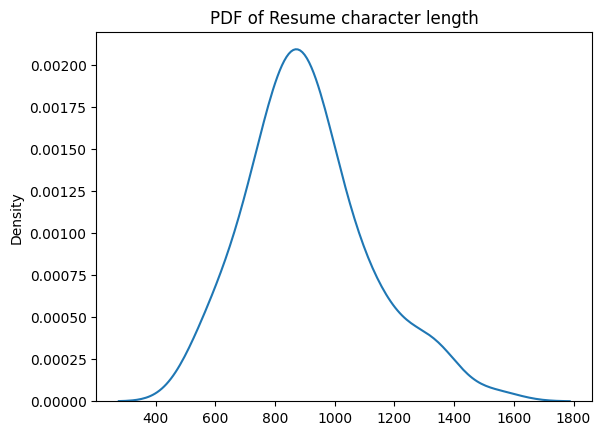

In [14]:
print('Min resume character length '+str(min(resumeStrLen)))
print('Max resume character length '+str(max(resumeStrLen)))
sns.kdeplot(resumeStrLen)
plt.title('PDF of Resume character length')
plt.show()

Spearman Rank Correlation Coefficient is 0.18769627151171253


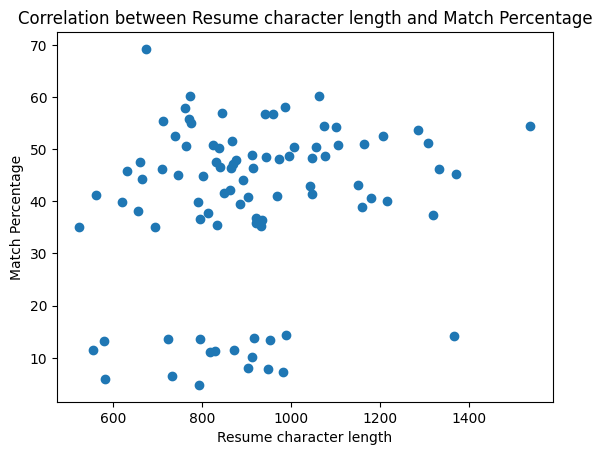

In [15]:
#statistical measure that quantifies the strength and direction of the monotonic relationship between two variables

print('Spearman Rank Correlation Coefficient is', stats.spearmanr(resumeStrLen, csvData['Match Percentage']).correlation)
plt.scatter(resumeStrLen, csvData['Match Percentage'])
plt.title('Correlation between Resume character length and Match Percentage')
plt.xlabel('Resume character length')
plt.ylabel('Match Percentage')
plt.show()

# Data Cleaning

In [16]:
#concatenate words fucntion

def concat(s):
    '''Concatenate words like "D A T A  S C I E N C E" to get "DATA SCIENCE"'''
    
    # add spaces at both end for better processing
    
    s = ' '+s+' '
    
    while True:
        
        # search if more than two alphabets are separated by space
        
        x = re.search(r"(\s[a-zA-Z]){2,}\s", s)
        
        if x==None:
            
            break
        # replace to get the concatenation
        
        s = s.replace(x.group(),' '+x.group().replace(' ','')+' ')
        
    return s

In [17]:
# functions to preprocess text

#concatenation
#convertion of specific from
#stop word removal
#conversion of special symbols
#lemmatizer to reduce the inflections
#removal of space

def preprocess_text(x, removeStopWords=False):
    # convert to lower case
    x = str(x).lower()
    # replace unusual quotes with '
    x = x.replace("′", "'").replace("’", "'")
    # replace new line with space
    x = x.replace("\n", " ")
    # concatenate
    x = concat(x)
    # remove links
    x = re.sub(r"http\S+", "", x)
    
    # convert education degrees like B.Tech or BTech to a specified form
    x = re.sub(r"\s+b[.]?[ ]?tech[(. /]{1}", " btech bachelor of technology ", x)
    x = re.sub(r"\s+m[.]?[ ]?tech[(. ]{1}", " mtech master of technology ", x)
    x = re.sub(r"\s+b[.]?[ ]?a[(. ]{1}", " ba bachelor of arts ", x)
    x = re.sub(r"\s+m[.]?[ ]?a[(. ]{1}", " ma master of arts ", x)
    x = re.sub(r"\s+b[.]?[ ]?sc[(. ]{1}", " bsc bachelor of science ", x)
    x = re.sub(r"\s+m[.]?[ ]?sc[(. ]{1}", " msc master of science ", x)
    x = re.sub(r"\s+b[.]?[ ]?e[(. ]{1}", " beng bachelor of engineering ", x)
    x = re.sub(r"\s+m[.]?[ ]?e[(. ]{1}", " meng master of engineering ", x)
    x = re.sub(r"\s+b[.]?[ ]?c[.]?[ ]?a[(. ]{1}", " bca bachelor of computer applications ", x)
    x = re.sub(r"\s+m[.]?[ ]?c[.]?[ ]?a[(. ]{1}", " mca master of computer applications ", x)
    x = re.sub(r"\s+b[.]?[ ]?b[.]?[ ]?a[(. ]{1}", " bba bachelor of business administration ", x)
    x = re.sub(r"\s+m[.]?[ ]?b[.]?[ ]?a[(. ]{1}", " mba master of business administration ", x)
    
    # convert skills with special symbols to words
    x = x.replace("c++", "cplusplus")
    x = x.replace("c#", "csharp")
    x = x.replace(".net", "dotnet")
    
    # replace non alpha numeric character with space
    x = re.sub('\W', ' ', x)
    
    # if remove stop words flag set then remove them
    z = []
    for i in x.split():
        if not (removeStopWords and i in stopwords.words('english')):
            # use lemmatizer to reduce the inflections
            lemmatizer = WordNetLemmatizer()
            i = lemmatizer.lemmatize(i)
            z.append(i)
    z = ' '.join(z)
    
    # strip white spaces
    z = z.strip()
    return z

In [18]:
# preprocess job description


jd_processed = preprocess_text(jd, removeStopWords=True)
print(jd_processed)

machine learning engineering 13585abc knowledge innovation focus researching building designing self running artificial intelligence ai system automate predictive model responsible design create ai algorithm capable learning making prediction define machine learning ml experience qualification bachelor master degree mention course per requirement 0 2 year work experience providing analytics solution commercial setting technical expertise must machine learning clustering logistic regression classification different library scikit learn numpy panda matplotlib seaborn deep learning framework tensorflow kera pytorch application neural network model cnn rnn gans familiar natural language processing associated library like nltk spacy beautiful soup pyspark hadoop big data pipeline data science methodology exploratory data analysis feature engineering model selection deployment model scale model evaluation deploying nlp architecture computer vision model production considered plus transformer

In [19]:
# preprocess all resumes
resumes = []
for candidateID in csvData.CandidateID.values:
    # load resume pdf
    resume = pdf2Text('D:\Research Docs\dataset\\trainResumes\\'+candidateID+'.pdf')
    # preprocess
    resume_processed = preprocess_text(resume, removeStopWords=True)
    resumes.append(resume_processed)

In [20]:
for i in range(5):
    print(resumes[i])
    print('\n\n'+'*'*80+'\n\n')

liam andrew fresher work experience intern trainee jan 2020 apr 2020dictis responsible performing helping decision making academic profile btech bachelor technology civil garodia institute technosciences 2020 executive summary fresher strong statistical analytic capability someone driven passion problem solving though civil engineering background always fascinated data machine learning evolving iit personal skill data analyst data mining data visualization machine learning linear regression statistical modeling predictive modeling sql server oracle python project railway signal determiner using relay weight system extra curriculars data preprocessing python data visualization power bi


********************************************************************************


ellie mackey fresher intern executive profile actively seeking job enthusiast master degree electronics telecommunication keen learn eagerly looking opportunity activity machine learning python project mine analyze data d

In [21]:
# creating structured data frame
data = pd.DataFrame({'job_description': [jd_processed]*len(csvData), 'processed_resume': resumes, 'match_percentage': csvData['Match Percentage']})

In [22]:
print(data.head())

                                     job_description   
0  machine learning engineering 13585abc knowledg...  \
1  machine learning engineering 13585abc knowledg...   
2  machine learning engineering 13585abc knowledg...   
3  machine learning engineering 13585abc knowledg...   
4  machine learning engineering 13585abc knowledg...   

                                    processed_resume  match_percentage  
0  liam andrew fresher work experience intern tra...             13.60  
1  ellie mackey fresher intern executive profile ...             36.63  
2  telco trainee intern may 2018 dec 2018 data ha...             54.93  
3  jimmy gartner da ta manager professional profi...             41.46  
4  amz loan mortgage erc analytics jun 2019 till ...             48.91  


In [23]:
def feature_extract(data):
    '''extract features'''
    # number of words in resume
    data['resume_word_num'] = data.processed_resume.apply(lambda x: len(x.split()))
    # number of unique words in job description and resumes 
    data['total_unique_word_num'] = data.apply(lambda x: len(set(x.job_description.split()).union(set(x.processed_resume.split()))) ,axis=1)
    # number of common words in job description and resumes
    data['common_word_num'] = data.apply(lambda x: len(set(x.job_description.split()).intersection(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by total number of unique words combined in both job description and resumes
    data['common_word_ratio'] = data['common_word_num'] / data.apply(lambda x: len(set(x.job_description.split()).union(set(x.processed_resume.split()))) ,axis=1)
    # number of common words divided by minimum number of unique words between job description and resumes
    data['common_word_ratio_min'] = data['common_word_num'] / data.apply(lambda x: min(len(set(x.job_description.split())), len(set(x.processed_resume.split()))) ,axis=1) 
    # number of common words divided by maximum number of unique words between job description and resumes
    data['common_word_ratio_max'] = data['common_word_num'] / data.apply(lambda x: max(len(set(x.job_description.split())), len(set(x.processed_resume.split()))) ,axis=1) 
    
    # applying the Fuzz WRatio algorithm to calculate similarity scores between the "job_description" and "processed_resume" columns in a pandas DataFrame
    data["fuzz_ratio"] = data.apply(lambda x: fuzz.WRatio(x.job_description, x.processed_resume), axis=1)
    # Fuzz partial ratio
    data["fuzz_partial_ratio"] = data.apply(lambda x: fuzz.partial_ratio(x.job_description, x.processed_resume), axis=1)
    # Fuzz token set ratio
    data["fuzz_token_set_ratio"] = data.apply(lambda x: fuzz.token_set_ratio(x.job_description, x.processed_resume), axis=1)
    # Fuzz token sort ratio
    data["fuzz_token_sort_ratio"] = data.apply(lambda x: fuzz.token_sort_ratio(x.job_description, x.processed_resume), axis=1)
    
    # is fresher
    data['is_fresher'] = data.processed_resume.apply(lambda x: int('fresher' in x.split()))
    
    
    # fill na fields with 0
    data.fillna(0, inplace=True)
    return data

In [24]:
# get features
data_feature = feature_extract(data)

In [25]:
data_feature.head()

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher
0,machine learning engineering 13585abc knowledg...,liam andrew fresher work experience intern tra...,13.60,86,192,13,0.067708,0.180556,0.097744,86,17,31,1,1
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.150000,0.364865,0.203008,86,8,55,3,1
2,machine learning engineering 13585abc knowledg...,telco trainee intern may 2018 dec 2018 data ha...,54.93,91,183,18,0.098361,0.264706,0.135338,86,17,42,3,1
3,machine learning engineering 13585abc knowledg...,jimmy gartner da ta manager professional profi...,41.46,115,207,21,0.101449,0.221053,0.157895,29,19,31,1,0
4,machine learning engineering 13585abc knowledg...,amz loan mortgage erc analytics jun 2019 till ...,48.91,101,196,21,0.107143,0.250000,0.157895,86,6,39,1,0


In [26]:
# remove common_word_ratio and common_word_ratio_max columns
data_feature.drop(columns=['common_word_ratio', 'common_word_ratio_max'], inplace=True)

In [27]:
print(data_feature.shape)

(90, 12)


In [28]:
# Step 1: Prepare the Dataset
X =data_feature.drop('match_percentage', axis=1)
y = data_feature['match_percentage']


In [29]:
# do train test split
X_train, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
# get train and test indices
train_indices = X_train.index
test_indices = X_test.index

In [31]:
# Get the length of the train indices
train_length = len(train_indices)

# Get the length of the test indices
test_length = len(test_indices)

print("Length of train indices:", train_length)
print("Length of test indices:", test_length)


Length of train indices: 63
Length of test indices: 27


# TFIDF Vectorizer

In [32]:
from scipy.sparse import hstack


vectorizer1 = TfidfVectorizer()

# # Fit and transform the job description and processed resume data into TF-IDF features
# X_transformed = vectorizer1.fit_transform(X['job_description'] + " " + X['processed_resume'])
job_transformed = vectorizer1.fit_transform(X['job_description'])
resume_transformed = vectorizer1.fit_transform(X['processed_resume'])

# Combine the transformed data horizontally
X_transformed = hstack((job_transformed, resume_transformed))                         

In [33]:
print(X_transformed.shape)

(90, 2177)


# Linear Regression

In [34]:
model = Ridge(alpha=1e-15, fit_intercept=False, normalize=True, solver='sag')

kf = KFold(n_splits=5)

mse_scores = []

for train_index, test_index in kf.split(X_transformed):
    
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #linear model with l2 regularizer 
    
   
    
    # Train the model
    
    model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    
    y_pred = model.predict(X_test)

    # Evaluate the model
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds

mean_mse = np.mean(mse_scores)

#print mean squred error

print("Mean Squared Error:", mean_mse)

# Calculate the score of the model on the training data

train_score = model.score(X_train, y_train)

# Calculate the score of the model on the test data

test_score = model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)


print("Model Score (Test):", test_score)


Mean Squared Error: 125.29010291018638
Model Score (Training): 0.9999793302961713
Model Score (Test): 0.4842588328630194


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
 #optimum alpha for Ridge Regularization 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1e-15}
-146.72208042196692


In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_search =GridSearchCV(estimator=model ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.48600416897042387

In [37]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

0.9999896031606806
Ridge(alpha=0.001, fit_intercept=False, normalize=True, solver='sag')
{'alpha': 0.001, 'solver': 'sag'}


# KNN Regression


=============


In [38]:


#model
knn_model = KNeighborsRegressor(metric='manhattan', n_neighbors=9, p=1, weights='distance')

#k-fold validation
kf = KFold(n_splits=5)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    knn_model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)
print("Mean Squared Error:", mean_mse)

# Calculate the score of the model on the training data
train_score = knn_model.score(X_train, y_train)

# Calculate the score of the model on the test data
test_score = knn_model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)


Mean Squared Error: 186.63337224482225
Model Score (Training): 1.0
Model Score (Test): 0.13413128621263126


In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','cosine'],
    'p': [1, 2]
}
grid_search =GridSearchCV(estimator=knn_model ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.19756205505308244

In [40]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

1.0
KNeighborsRegressor(metric='manhattan', n_neighbors=7, p=1, weights='distance')
{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


# Decision Tree Regressor

In [41]:


# Step 3: Build the Machine Learning Model and Perform Cross-Validation
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)


kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    dt_model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = dt_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

print("Mean Squared Error:", mean_mse)


# Calculate the score of the model on the training data
train_score = dt_model.score(X_train, y_train)

# Calculate the score of the model on the test data
test_score = dt_model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)



Mean Squared Error: 252.94665880166917
Model Score (Training): 0.8387825536065272
Model Score (Test): 0.33136704627127334


In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     'max_depth': [None, 5, 10],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  
}
grid_search =GridSearchCV(estimator=dt_model ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.21401652985137698

In [43]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

0.8387825536065272
DecisionTreeRegressor(min_samples_leaf=4)
{'max_depth': None, 'min_samples_split': 2}


# Support Vector Regression (RBF)

In [44]:


# Step 3: Build the Machine Learning Model and Perform Cross-Validation
scr_model = SVR(C=10, epsilon=1, gamma=0.1, kernel='rbf')


kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    scr_model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = scr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

print("Mean Squared Error:", mean_mse)

# Calculate the score of the model on the training data
train_score = scr_model.score(X_train, y_train)

# Calculate the score of the model on the test data
test_score = scr_model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)



Mean Squared Error: 251.2924552785703
Model Score (Training): 0.14752231264092974
Model Score (Test): -0.07191951340305969


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
       'C': [0.1, 1, 10],                # Regularization parameter
    'gamma': [0.1, 1, 10],             # Kernel coefficient for 'rbf' kernel
    'epsilon': [0.01, 0.1, 1]  
}
grid_search =GridSearchCV(estimator=scr_model ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.014847603142140064

In [46]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

0.5693895582852315
SVR(C=10, epsilon=1, gamma=1)
{'C': 10, 'epsilon': 1, 'gamma': 1}


# Support Vector (Linear Kernel)

In [47]:


# Step 3: Build the Machine Learning Model and Perform Cross-Validation
svr_model_linear = SVR(C=10, epsilon=0.01, kernel='linear')


kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    svr_model_linear.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = svr_model_linear.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

print("Mean Squared Error:", mean_mse)

# Calculate the score of the model on the training data
train_score = svr_model_linear.score(X_train, y_train)

# Calculate the score of the model on the test data
test_score = svr_model_linear.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)



Mean Squared Error: 181.5650102788942
Model Score (Training): 0.6950190591221729
Model Score (Test): 0.23485981669592604


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
   'C': [0.1, 1, 10],              # Regularization parameter
    'epsilon': [0.01, 0.1, 1]     
}
grid_search =GridSearchCV(estimator=svr_model_linear ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.23485981669592604

In [49]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

0.6950190591221729
SVR(C=10, epsilon=0.01, kernel='linear')
{'C': 10, 'epsilon': 0.01}


# Random Forest Regressor

In [50]:

# Step 3: Build the Machine Learning Model and Perform Cross-Validation
rfr_model = RandomForestRegressor(max_depth=20, n_estimators=50)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    rfr_model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = rfr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

print("Mean Squared Error:", mean_mse)
# Calculate the score of the model on the training data
train_score = rfr_model.score(X_train, y_train)

# Calculate the score of the model on the test data
test_score = rfr_model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)



Mean Squared Error: 184.45502908755552
Model Score (Training): 0.905261924387241
Model Score (Test): 0.3167266031294005


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
  'n_estimators': [50, 70, 100, 150],              # Number of trees in the forest
    'max_depth': [10, 15, 20],                    # Maximum depth of each tree
    'min_samples_split': [2, 3, 5],               # Minimum number of samples required to split an internal node
      
}
grid_search =GridSearchCV(estimator=rfr_model ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.2361190515403082

In [52]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

0.8885317551994356
RandomForestRegressor(max_depth=15, min_samples_split=5)
{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}


# XGBoost Regressor


In [53]:


# Step 3: Build the Machine Learning Model and Perform Cross-Validation
xgb_model = xgb.XGBRegressor()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

print("Mean Squared Error:", mean_mse)


# Calculate the score of the model on the training data
train_score = xgb_model.score(X_train, y_train)

# Calculate the score of the model on the test data
test_score = xgb_model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)



Mean Squared Error: 255.76561695794777
Model Score (Training): 0.9999999994310345
Model Score (Test): 0.1250933246439685


In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 'n_estimators': [50, 70, 100, 150],          # Number of boosting stages
    'learning_rate': [0.01, 1, 0.01],       # Learning rate (shrinkage)
    'max_depth': [2, 3, 5, 7],
    'reg_lambda': [  0.001, 1000, 0.001]              # Minimum number of samples required to split an internal node
      
}
grid_search =GridSearchCV(estimator=xgb_model ,param_grid =param_grid ,cv =5)
grid_search.fit(X_train,y_train)
best_param =grid_search.best_params_
grid_search.score(X_test,y_test)

0.21609718657894916

In [55]:
print( grid_search.score(X_train,y_train))
best_model = grid_search.best_estimator_
print(best_model)
print(best_param)

0.923381571800341
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 150, 'reg_lambda': 1000}


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Step 1: Prepare the Dataset
X = data[['job_description', 'processed_resume']]
y = data['match_percentage']

# Step 2: TF-IDF Encoding
vectorizer1 = TfidfVectorizer()
X_transformed = vectorizer1.fit_transform(X['job_description'] + " " + X['processed_resume'])

# Step 3: Build the Base Models
base_models = [
#     ('Ridge', Ridge(alpha=0.1, fit_intercept=False, normalize=True, solver='lsqr')),
     ('svr_model_linear' , SVR(C=10, epsilon=0.01, kernel='linear')),
     ('rfr_model',  RandomForestRegressor(max_depth=20, n_estimators=50)),
     ('dt_model', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4) ),
     ('scr_model',SVR(C=10, epsilon=1, gamma=0.1, kernel='rbf') )

]

# Step 4: Build the Stacking Model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator = KNeighborsRegressor(metric='manhattan', n_neighbors=9, p=1, weights='distance')
)

# Step 5: Perform Cross-Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

mse_scores = []
for train_index, test_index in kf.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict the matching percentages for the test set
    y_pred = stacking_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

print("Mean Squared Error:", mean_mse)

# Calculate the score of the stacking model on the training data
train_score = stacking_model.score(X_train, y_train)

# Calculate the score of the stacking model on the test data
test_score = stacking_model.score(X_test, y_test)

# Print the scores
print("Model Score (Training):", train_score)
print("Model Score (Test):", test_score)


Mean Squared Error: 197.84184943886586
Model Score (Training): 0.5637175724118737
Model Score (Test): 0.3334156568984755


In [65]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer


resumes_folder = 'C:\\Users\\PC\\Documents\\resume-test'
resume_files = os.listdir(resumes_folder)

matching_percentages = {}

for resume_file in resume_files:

    resume_path = os.path.join(resumes_folder, resume_file)

    new_resume = pdf2Text(resume_path)

    new_job_description = pdf2Text('D:\\Research Docs\\dataset\\jd.pdf')

    # Step 1: Preprocess the New Data
    # Apply any necessary preprocessing steps to the new job description and resume
    processed_new_job_description = preprocess_text(new_job_description)
    processed_new_resume = preprocess_text(new_resume)

    # Step 2: Perform TF-IDF Encoding on the New Data
    # Transform the preprocessed new job description and resume into TF-IDF features

    new_data_transformed = vectorizer1.transform([processed_new_job_description + " " + processed_new_resume])

    # Step 3: Make Predictions for the New Data
    # Predict the matching percentage for the new data using the trained model
    new_data_prediction = stacking_model.predict(new_data_transformed)

    # Step 4: get Matching percentage
    print("Matching Percentage Prediction:", new_data_prediction)

#sort outputs
sorted_matching_percentages = sorted(matching_percentages.items(), key=lambda x: x[1], reverse=True)

# Print the ranked resumes
for resume_file, matching_percentage in sorted_matching_percentages:
    print(f"Resume: {resume_file}")
    print("Matching Percentage:", matching_percentage)
    print()

Matching Percentage Prediction: [28.20599427]
Matching Percentage Prediction: [29.30779989]
Matching Percentage Prediction: [39.45164546]
